In [2]:
# !pip install pandas
# !pip install numby
#!pip install matplotlib
#!pip install seaborn
# !pip install scikit-learn

In [3]:
import numpy as nu
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("autoscout-germanytest-dataset.csv")

In [5]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,NaN,116,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877.0,122,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,NaN,160,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950.0,110,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950.0,156,2011


In [6]:
df.tail()

,mileage,make,model,fuel,gear,offerType,price,hp,year
223,61999,Honda,Civic,Gasoline,Manual,Used,7949.0,99,2011
224,87216,Volkswagen,Golf,Gasoline,Manual,Used,7970.0,122,2011
225,120600,Ford,Focus,Gasoline,Manual,Used,7970.0,150,2011
226,119850,Volkswagen,Polo,Gasoline,Automatic,Used,7990.0,86,2011
227,154500,Volkswagen,Passat Variant,Gasoline,Manual,Used,7990.0,160,2011


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    228 non-null    int64  
 1   make       228 non-null    object 
 2   model      228 non-null    object 
 3   fuel       228 non-null    object 
 4   gear       228 non-null    object 
 5   offerType  228 non-null    object 
 6   price      226 non-null    float64
 7   hp         228 non-null    int64  
 8   year       228 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 16.2+ KB


In [8]:
df.describe()

,mileage,price,hp,year
count,228.000000,226.000000,228.000000,228.000000
mean,80266.947368,18912.995575,149.442982,2015.688596
std,68046.383596,18617.055412,80.792502,3.321861
min,9.000000,5555.000000,60.000000,2011.000000
25%,28359.500000,7990.000000,100.500000,2013.000000
50%,68959.500000,9490.000000,125.000000,2016.000000
75%,113000.000000,27440.000000,170.000000,2019.000000
max,427000.000000,83890.000000,400.000000,2021.000000


In [9]:
df.isnull().sum()

mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
price        2
hp           0
year         0
dtype: int64

In [10]:
df["price"] = df["price"].fillna(df["price"].mean)

In [11]:
df.isnull().sum()

mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
price        0
hp           0
year         0
dtype: int64

In [26]:
df.shape

(217, 9)

In [13]:
df.duplicated().sum()

np.int64(11)

In [14]:
df = df.drop_duplicates()

In [15]:
df.duplicated().sum()

np.int64(0)

In [17]:
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["price"] = df["price"].fillna(df["price"].mean())
df["price"] = df["price"].astype(int)

In [18]:
df['mileage'] = df["mileage"].astype(int)
df["price"] = df["price"].astype(int)
df["hp"] = df["hp"].astype(int)
df["year"] = df["year"].astype(int)

C:\Users\ao938\AppData\Local\Temp\ipykernel_9928\2426729390.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=pricecar.values, y=pricecar.index, palette='Blues_r',ci=None)
C:\Users\ao938\AppData\Local\Temp\ipykernel_9928\2426729390.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pricecar.values, y=pricecar.index, palette='Blues_r',ci=None)


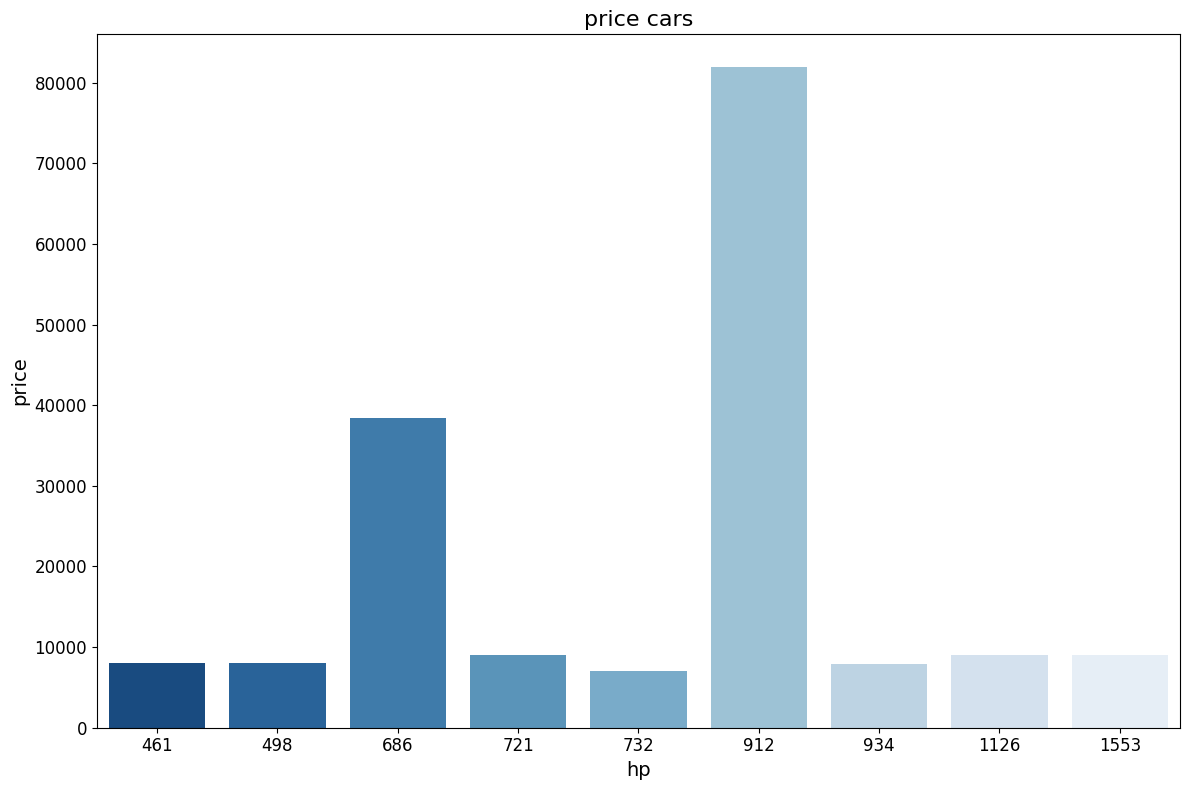

In [24]:
pricecar = df.groupby('price')['hp'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=pricecar.values, y=pricecar.index, palette='Blues_r',ci=None)
plt.title('price cars', fontsize=16)
plt.xlabel("hp", fontsize=14)
plt.ylabel("price", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

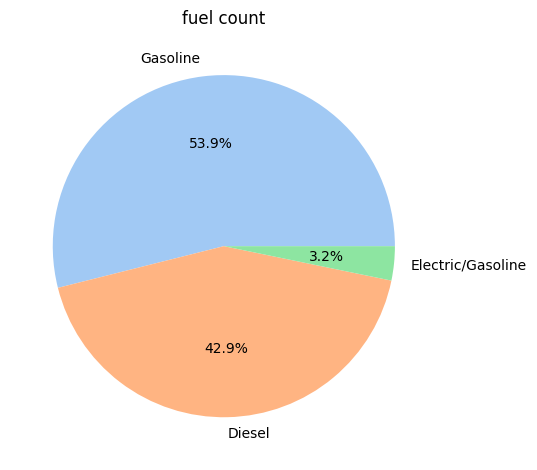

In [21]:
fuel_count = df["fuel"].value_counts()
plt.title("fuel count")
plt.pie(fuel_count,labels=fuel_count.index,autopct='%1.1f%%',colors=sns.color_palette("pastel"))
plt.tight_layout()
plt.show()

C:\Users\ao938\AppData\Local\Temp\ipykernel_9928\1850813615.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cars_price.values, y=top_cars_price.index, palette='Reds_r')


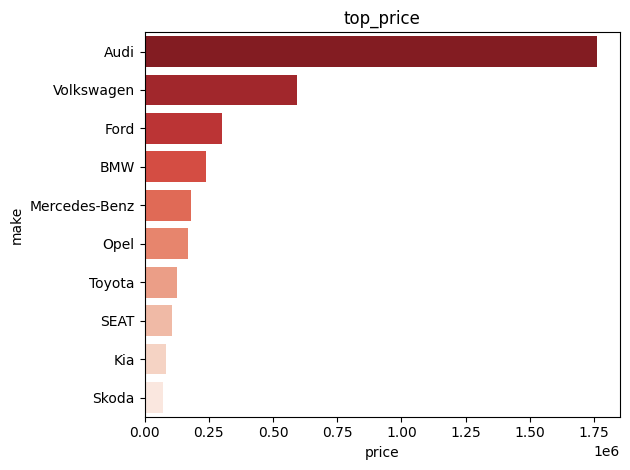

In [22]:
top_cars_price = df.groupby("make")["price"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_cars_price.values, y=top_cars_price.index, palette='Reds_r')
plt.title('top_price')
plt.xlabel("price")
plt.ylabel("make")
plt.tight_layout()
plt.show()


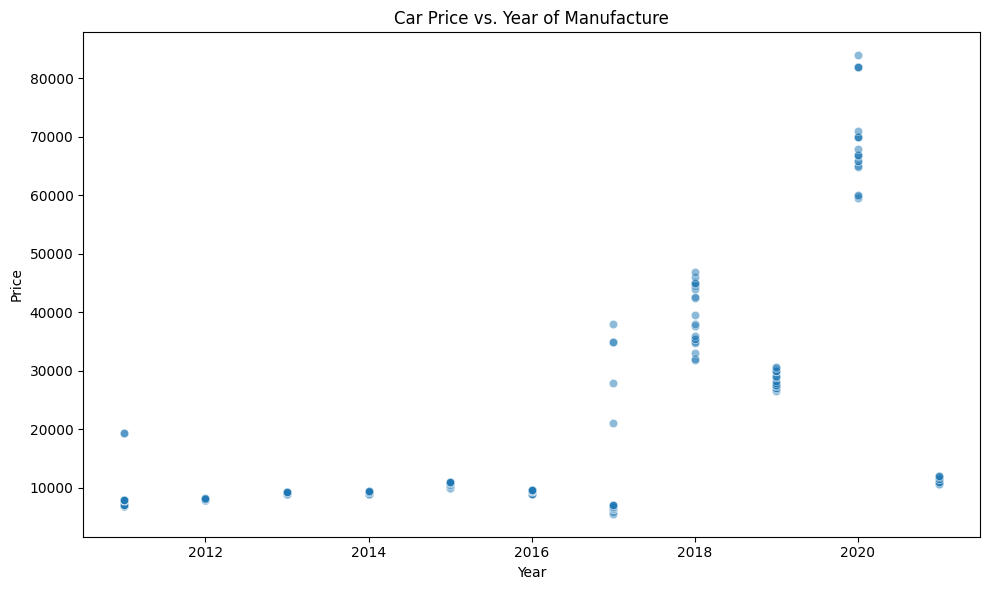

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=df, alpha=0.5)
plt.title('Car Price vs. Year of Manufacture')
plt.xlabel('Year')
plt.ylabel('Price')
plt.tight_layout()
plt.show()